# Genesis Token Distribution

In [204]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import itertools
import re
import json

In [205]:
data = []

with open('data/data.json') as json_file:

    file = json.load(json_file)

    for line in file:
        output = {}

        output["name"] = line['name']
        output["Relay chain"] = line['relay_chain']
        output["Market supply"] = line['market_supply']
        output["Circulation supply"] = line['circulation_supply']
        output["Market cap"] = line['market_cap']

        for k in line["token_distribution"]:
            output[k[0]] = k[1]

        data.append(output)

df = pd.DataFrame(data)
df.fillna(0, inplace=True)

df.head(10)

,name,Relay chain,Market supply,Circulation supply,Market cap,tokenomics,ParachainLease,Investors,FoundingGroup,EcosystemPrograms,...,ParachainAuctionin2021,UsersandEarlyAdapter,ParachainAuctionsReserve,On-ChainDAO,Incubator&Advisor,Treasure&Reserves,Auction&Liquidity,FoundationReserver,MintMining,AvailableforSale
0,Collectives,Polkadot,0,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,DataHighway,Polkadot,0,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Bit.Country Continuum,Polkadot,0,0,0,current,30.0,25.0,20.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Ares Protocol,Polkadot,1000000000,229319304,284692,current,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Apron Network,Polkadot,1000000000,869599,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,OmniBTC,Polkadot,2079001,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Bitgreen,Polkadot,300000003,0,0,current,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Zeitgeist,Kusama,100000000,9409408,555910,current,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Watr,Polkadot,0,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Unique Network,Polkadot,67770563,10,0,current,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [206]:
import csv

df.keys()
df.to_csv('data/dirty_data.csv', index=False)

file = open('data/dirty_categories.csv', 'w+')
with file:
    writer = csv.writer(file)
    writer.writerow(df.keys())

In [207]:
subcategories_df = df[['name', 'Relay chain','Market supply', 'Circulation supply', 'Market cap']].copy()

subcategories_df.head(10)

,name,Relay chain,Market supply,Circulation supply,Market cap
0,Collectives,Polkadot,0,0,0
1,DataHighway,Polkadot,0,0,0
2,Bit.Country Continuum,Polkadot,0,0,0
3,Ares Protocol,Polkadot,1000000000,229319304,284692
4,Apron Network,Polkadot,1000000000,869599,0
5,OmniBTC,Polkadot,2079001,0,0
6,Bitgreen,Polkadot,300000003,0,0
7,Zeitgeist,Kusama,100000000,9409408,555910
8,Watr,Polkadot,0,0,0
9,Unique Network,Polkadot,67770563,10,0


# Filter out the categories in the new categories list

In [208]:
categories = pd.read_csv('data/categories.csv')

print(categories)

                  Scraped Label   Category   Subcategory
0                  EcosystemDev    Budgets     Ecosystem
1            FoundationReserver    Reserve       Reserve
2                       Backers  Investors  Second Round
3                  FoundingTeam   Founders      Founders
4                  EarlyBackers  Investors    Seed Round
..                          ...        ...           ...
257                     Council   Founders      Founders
258                    Giveaway    Budgets     Ecosystem
259           Treasure&Reserves    Reserve       Reserve
260             ProtocolReserve    Reserve       Reserve
261  StrategicPartners&Advisors  Investors  Second Round

[262 rows x 3 columns]


In [209]:
categories["Subcategory"].unique()

array(['Ecosystem', 'Reserve', 'Second Round', 'Founders', 'Seed Round',
       'Crowdloan', 'Auctions', 'Community', 'Marketing', 'Liquidity',
       'Developers'], dtype=object)

In [210]:
for Subcategory in categories["Subcategory"].unique():
  subcategories_df[Subcategory] = 0

subcategories_df.head(10)

,name,Relay chain,Market supply,Circulation supply,Market cap,Ecosystem,Reserve,Second Round,Founders,Seed Round,Crowdloan,Auctions,Community,Marketing,Liquidity,Developers
0,Collectives,Polkadot,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,DataHighway,Polkadot,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Bit.Country Continuum,Polkadot,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Ares Protocol,Polkadot,1000000000,229319304,284692,0,0,0,0,0,0,0,0,0,0,0
4,Apron Network,Polkadot,1000000000,869599,0,0,0,0,0,0,0,0,0,0,0,0
5,OmniBTC,Polkadot,2079001,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Bitgreen,Polkadot,300000003,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Zeitgeist,Kusama,100000000,9409408,555910,0,0,0,0,0,0,0,0,0,0,0
8,Watr,Polkadot,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Unique Network,Polkadot,67770563,10,0,0,0,0,0,0,0,0,0,0,0,0


In [211]:
# Populate the dataframe with the respective values
for index, row  in categories.iterrows():
  try:
    subcategories_df[row["Subcategory"]] += df[row["Scraped Label"]]
  except:
    continue


subcategories_df.head(10)

,name,Relay chain,Market supply,Circulation supply,Market cap,Ecosystem,Reserve,Second Round,Founders,Seed Round,Crowdloan,Auctions,Community,Marketing,Liquidity,Developers
0,Collectives,Polkadot,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,DataHighway,Polkadot,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Bit.Country Continuum,Polkadot,0,0,0,5.0,10.0,8.0,20.0,25.0,0.0,30.0,2.0,0.0,0.0,0.0
3,Ares Protocol,Polkadot,1000000000,229319304,284692,20.0,10.0,20.0,20.0,0.0,0.0,0.0,25.0,0.0,0.0,5.0
4,Apron Network,Polkadot,1000000000,869599,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,OmniBTC,Polkadot,2079001,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Bitgreen,Polkadot,300000003,0,0,0.0,0.0,0.0,35.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Zeitgeist,Kusama,100000000,9409408,555910,0.0,30.0,6.0,15.0,7.0,0.0,40.0,0.0,2.0,0.0,0.0
8,Watr,Polkadot,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Unique Network,Polkadot,67770563,10,0,0.0,24.0,8.0,18.0,35.0,15.0,0.0,0.0,0.0,0.0,0.0


# Populating the special categories

In [212]:
# Auction&Liquidity
subcategories_df["Auctions"] += df["Auction&Liquidity"]/2
subcategories_df["Liquidity"] += df["Auction&Liquidity"]/2

# ParachainandEcosystem
subcategories_df["Crowdloan"] += df["ParachainandEcosystem"]/2
subcategories_df["Ecosystem"] += df["ParachainandEcosystem"]/2

# Marketing,Ecosystem&Partnerships
subcategories_df["Marketing"] += df["Marketing,Ecosystem&Partnerships"]/2
subcategories_df["Ecosystem"] += df["Marketing,Ecosystem&Partnerships"]/2

# Development&Marketing
subcategories_df["Developers"] += df["Development&Marketing"]/2
subcategories_df["Marketing"] += df["Development&Marketing"]/2

# MarketingAndEcosystem
subcategories_df["Marketing"] += df["MarketingAndEcosystem"]/2
subcategories_df["Ecosystem"] += df["MarketingAndEcosystem"]/2

# EcosystemandCommunity
subcategories_df["Ecosystem"] += df["EcosystemandCommunity"]/2
subcategories_df["Community"] += df["MarketingAndEcosystem"]/2

# Incubator&Advisor
subcategories_df["Seed Round"] += df["Incubator&Advisor"]/2
subcategories_df["Founders"] += df["Incubator&Advisor"]/2

# Ecosystem&DevCommunity
subcategories_df["Ecosystem"] += df["Ecosystem&DevCommunity"]/2
subcategories_df["Community"] += df["Ecosystem&DevCommunity"]/2


subcategories_df.head(10)
subcategories_df.to_csv('data/export_subcategories.csv')

# Data Analysis

In [213]:
categorized_df = df[['name', 'Relay chain','Market supply', 'Circulation supply', 'Market cap']].copy()

for cat in categories["Category"].unique():
  categorized_df[cat] = 0

categorized_df.head(10)

,name,Relay chain,Market supply,Circulation supply,Market cap,Budgets,Reserve,Investors,Founders,Parachain,Liquidity
0,Collectives,Polkadot,0,0,0,0,0,0,0,0,0
1,DataHighway,Polkadot,0,0,0,0,0,0,0,0,0
2,Bit.Country Continuum,Polkadot,0,0,0,0,0,0,0,0,0
3,Ares Protocol,Polkadot,1000000000,229319304,284692,0,0,0,0,0,0
4,Apron Network,Polkadot,1000000000,869599,0,0,0,0,0,0,0
5,OmniBTC,Polkadot,2079001,0,0,0,0,0,0,0,0
6,Bitgreen,Polkadot,300000003,0,0,0,0,0,0,0,0
7,Zeitgeist,Kusama,100000000,9409408,555910,0,0,0,0,0,0
8,Watr,Polkadot,0,0,0,0,0,0,0,0,0
9,Unique Network,Polkadot,67770563,10,0,0,0,0,0,0,0


In [214]:
categories[ categories["Category"] == "Budgets"]["Subcategory"].unique()

array(['Ecosystem', 'Community', 'Marketing', 'Developers'], dtype=object)

In [215]:
categories

,Scraped Label,Category,Subcategory
0,EcosystemDev,Budgets,Ecosystem
1,FoundationReserver,Reserve,Reserve
2,Backers,Investors,Second Round
3,FoundingTeam,Founders,Founders
4,EarlyBackers,Investors,Seed Round
...,...,...,...
257,Council,Founders,Founders
258,Giveaway,Budgets,Ecosystem
259,Treasure&Reserves,Reserve,Reserve
260,ProtocolReserve,Reserve,Reserve


In [216]:
for cat in categories["Category"].unique():
  for subcat in categories[ categories["Category"] == cat]["Subcategory"].unique():
    categorized_df[cat] += subcategories_df[subcat]

categorized_df

,name,Relay chain,Market supply,Circulation supply,Market cap,Budgets,Reserve,Investors,Founders,Parachain,Liquidity
0,Collectives,Polkadot,0,0,0,0.0,0.00,0.00,0.00,0.0,0.0
1,DataHighway,Polkadot,0,0,0,0.0,0.00,0.00,0.00,0.0,0.0
2,Bit.Country Continuum,Polkadot,0,0,0,7.0,10.00,33.00,20.00,30.0,0.0
3,Ares Protocol,Polkadot,1000000000,229319304,284692,50.0,10.00,20.00,20.00,0.0,0.0
4,Apron Network,Polkadot,1000000000,869599,0,0.0,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
180,Ajuna Network,Polkadot,2400000048,0,0,22.0,16.00,26.00,16.00,20.0,0.0
181,Acala,Polkadot,1000000000,571172222,55747193,5.0,10.76,29.99,20.25,17.0,17.0
182,Manta Network,Polkadot,0,156000005156,0,56.0,0.00,29.00,15.00,0.0,0.0
183,Statemine,Kusama,0,0,0,0.0,0.00,0.00,0.00,0.0,0.0


# Scores

In [217]:
cat_mean = {}
cat_mean_total = 0
subcat_mean = {}
subcat_mean_total = 0

kusama_cat_mean = {}
kusama_cat_mean_total = 0
kusama_subcat_mean = {}
kusama_subcat_mean_total = 0

polkadot_cat_mean = {}
polkadot_cat_mean_total = 0
polkadot_subcat_mean = {}
polkadot_subcat_mean_total = 0

for cat in categories['Category'].unique():
  # Global
  cat_mean[cat] = categorized_df[cat].mean()
  cat_mean_total += cat_mean[cat]

  # Kusama
  kusama_cat_mean[cat] = categorized_df[categorized_df['Relay chain'] == 'Kusama'][cat].mean()
  kusama_cat_mean_total += kusama_cat_mean[cat]

  # Polkadot
  polkadot_cat_mean[cat] = categorized_df[categorized_df['Relay chain'] == 'Polkadot'][cat].mean()
  polkadot_cat_mean_total += polkadot_cat_mean[cat]

for subcat in categories['Subcategory'].unique():
  # Global
  subcat_mean[subcat] = subcategories_df[subcat].mean()
  subcat_mean_total += subcat_mean[subcat]

  # Kusama
  kusama_subcat_mean[subcat] = subcategories_df[subcategories_df['Relay chain'] == 'Kusama'][subcat].mean()
  kusama_subcat_mean_total += kusama_subcat_mean[subcat]

  # Polkadot
  polkadot_subcat_mean[subcat] = subcategories_df[subcategories_df['Relay chain'] == 'Polkadot'][subcat].mean()
  polkadot_subcat_mean_total += polkadot_subcat_mean[subcat]



In [218]:
print(polkadot_cat_mean)

for item in cat_mean:
  cat_mean[item] = (cat_mean[item]/cat_mean_total) * 100
  kusama_cat_mean[item] = (kusama_cat_mean[item]/kusama_cat_mean_total) * 100
  polkadot_cat_mean[item] = (polkadot_cat_mean[item]/polkadot_cat_mean_total) * 100



{'Budgets': 10.075611111111112, 'Reserve': 3.9726984126984126, 'Investors': 5.6302619047619045, 'Founders': 4.14484126984127, 'Parachain': 3.4087301587301586, 'Liquidity': 1.3650793650793651}


In [219]:
print(polkadot_subcat_mean)
print(kusama_subcat_mean)

for item in subcat_mean:
  subcat_mean[item] = (subcat_mean[item]/subcat_mean_total) * 100
  kusama_subcat_mean[item] = (kusama_subcat_mean[item]/kusama_subcat_mean_total) * 100
  polkadot_subcat_mean[item] = (polkadot_subcat_mean[item]/polkadot_subcat_mean_total) * 100

{'Ecosystem': 6.19645634920635, 'Reserve': 3.9726984126984126, 'Second Round': 2.7141507936507936, 'Founders': 4.14484126984127, 'Seed Round': 2.9161111111111113, 'Crowdloan': 2.0396825396825395, 'Auctions': 1.369047619047619, 'Community': 1.8916666666666666, 'Marketing': 0.723202380952381, 'Liquidity': 1.3650793650793651, 'Developers': 1.2642857142857145}
{'Ecosystem': 6.890350877192983, 'Reserve': 5.552631578947368, 'Second Round': 1.7892982456140352, 'Founders': 6.043859649122807, 'Seed Round': 2.780877192982456, 'Crowdloan': 8.930701754385964, 'Auctions': 3.956140350877193, 'Community': 8.629298245614034, 'Marketing': 1.4824561403508771, 'Liquidity': 5.780701754385965, 'Developers': 2.3859649122807016}


## Both relay chains

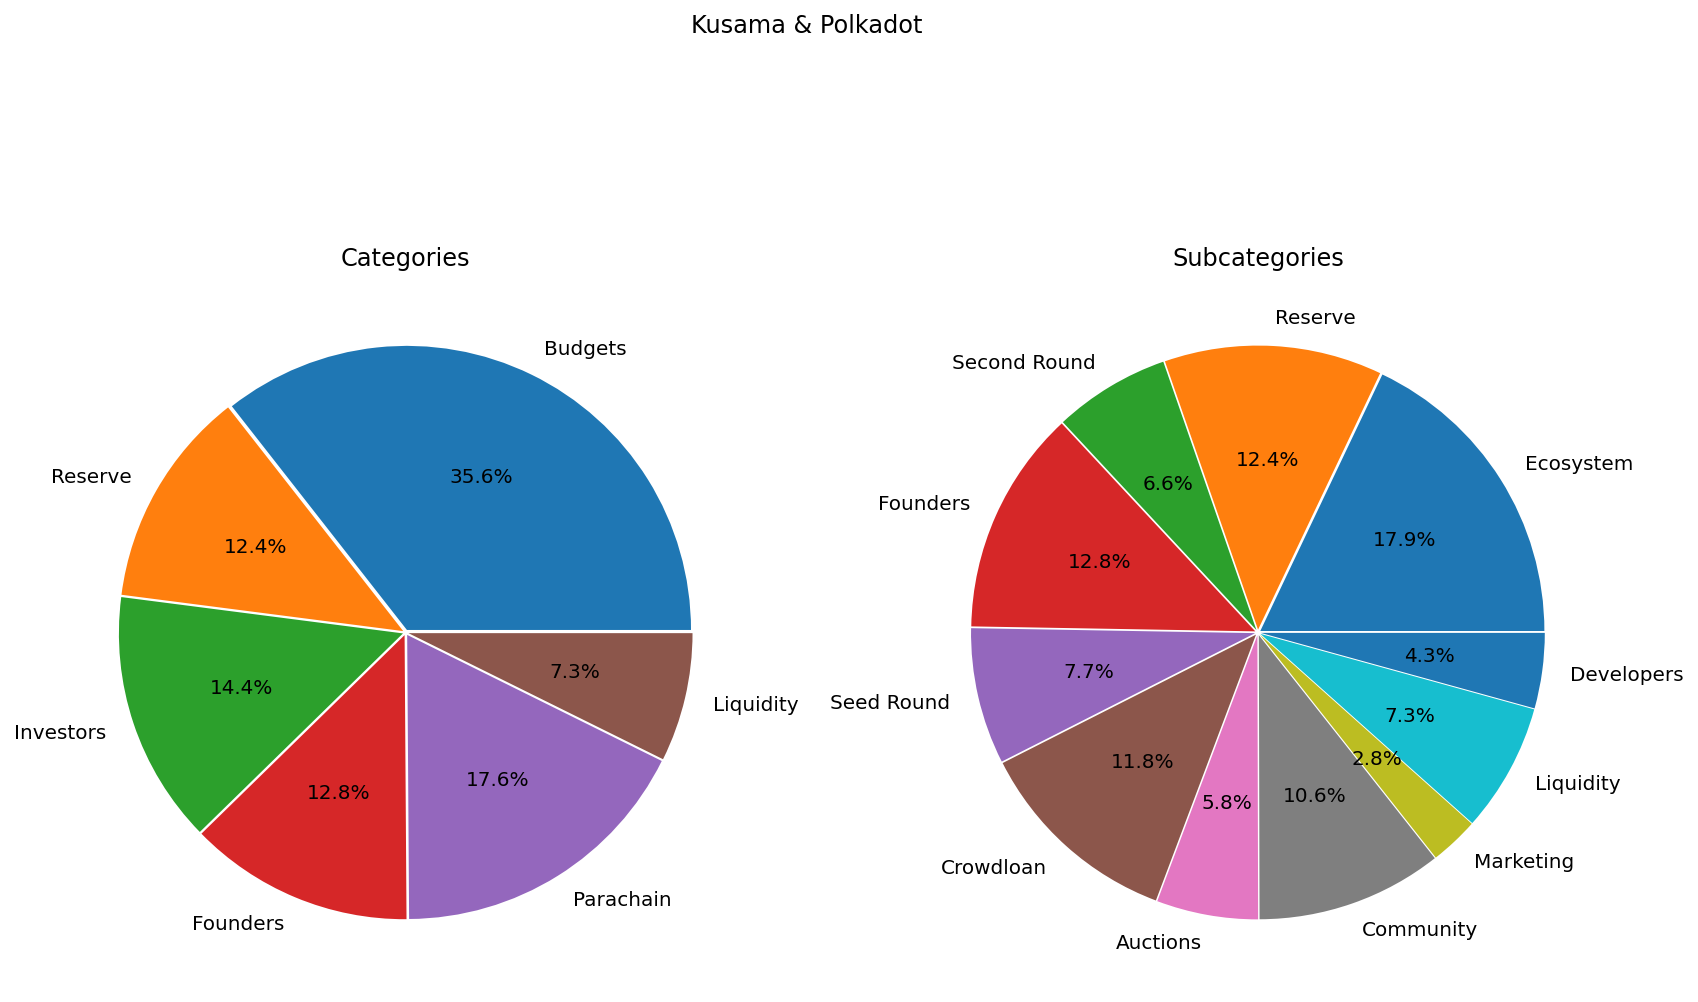

In [220]:
fig, axes = plt.subplots(1, 2, figsize=(14,9),dpi=144)
plt.suptitle("Kusama & Polkadot")

for ax, df, title in zip(axes, (cat_mean, subcat_mean), ('Categories', 'Subcategories')):
    labels = []
    sizes = []
    pop = []

    for x, y in df.items():
        labels.append(x)
        sizes.append(y)
        pop.append(.01)

    ax.pie(sizes, labels=labels, autopct='%1.1f%%', explode=pop, startangle=0)
    ax.set_title(title)

## Kusama

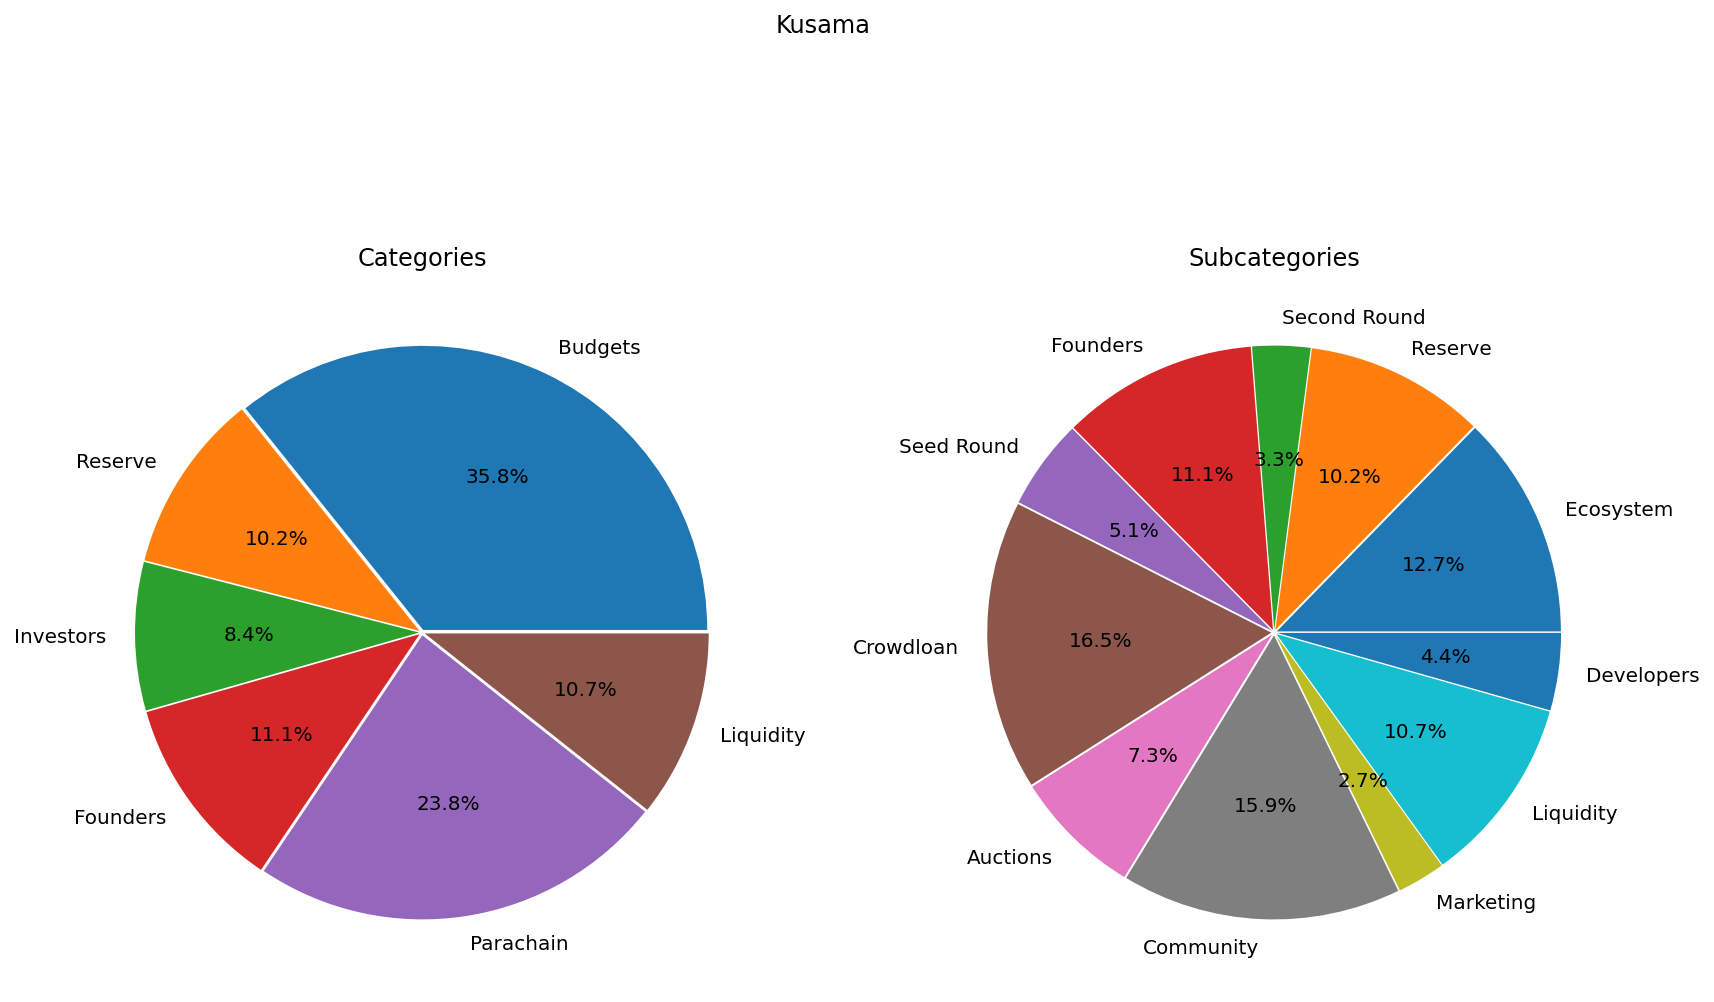

In [221]:
fig, axes = plt.subplots(1, 2, figsize=(14,9),dpi=144)
plt.suptitle("Kusama")

for ax, df, title in zip(axes, (kusama_cat_mean, kusama_subcat_mean), ('Categories', 'Subcategories')):
    labels = []
    sizes = []
    explode = []

    for x, y in df.items():
        labels.append(x)
        sizes.append(y)
        explode.append(.01)

    ax.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, startangle=0)
    ax.set_title(title)


## Polkadot

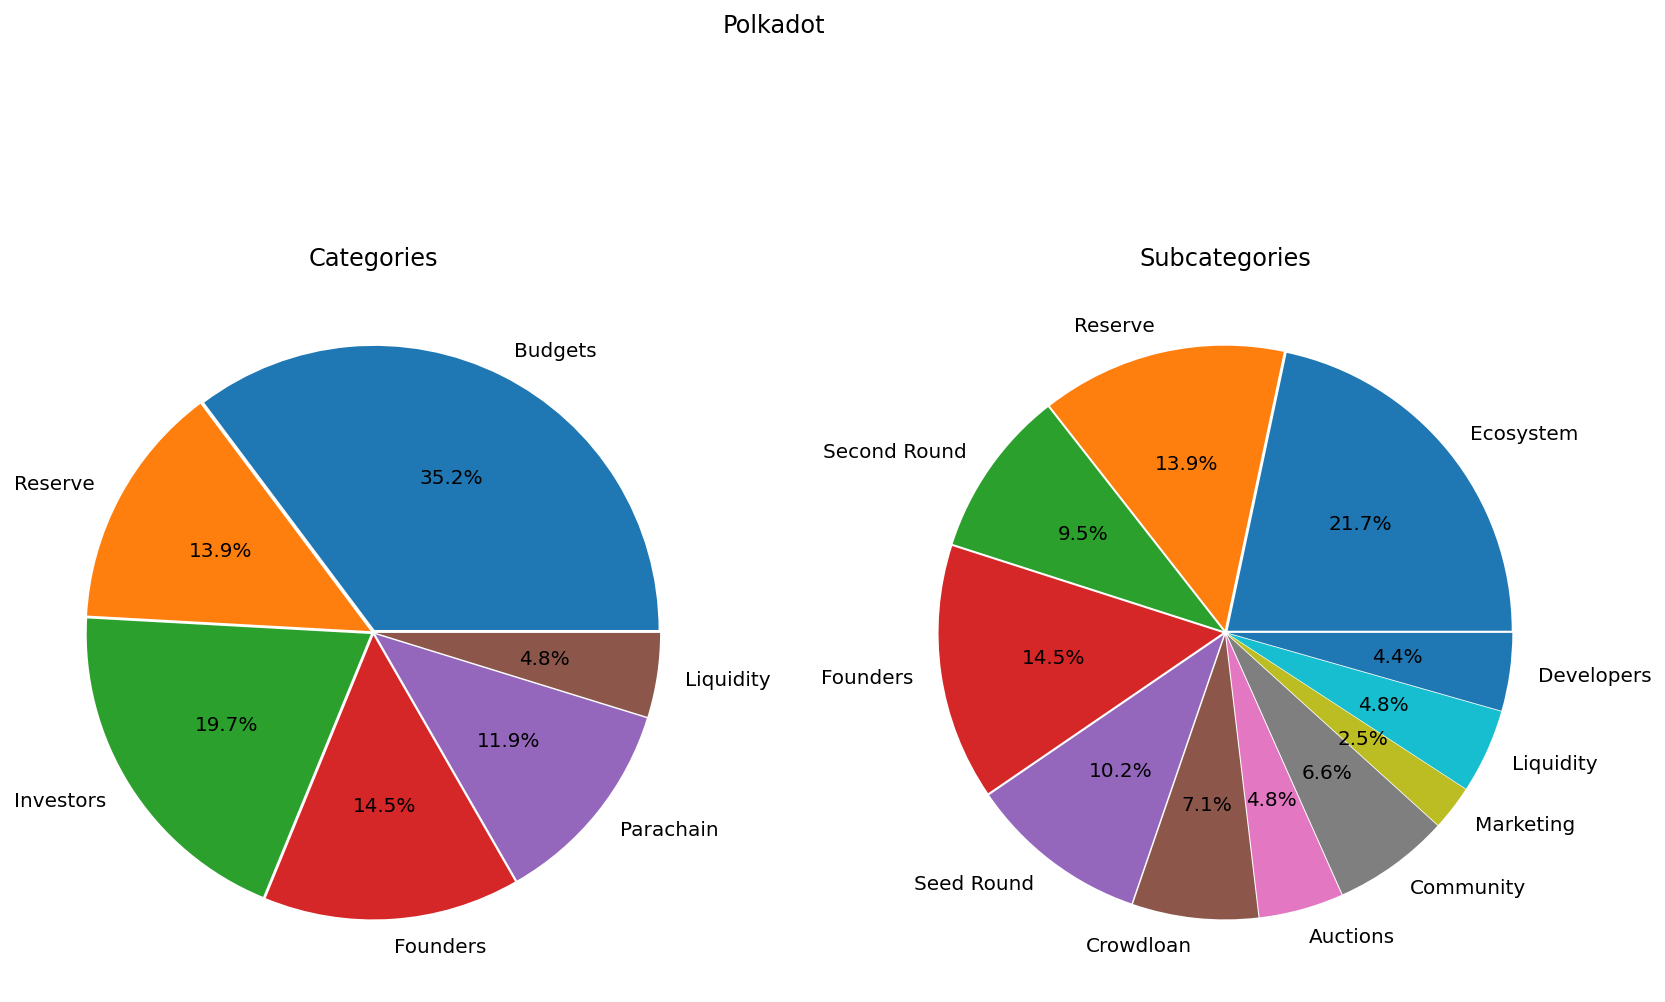

In [222]:
fig, axes = plt.subplots(1, 2, figsize=(14,9),dpi=144)
plt.suptitle("Polkadot")

for ax, df, title in zip(axes, (polkadot_cat_mean, polkadot_subcat_mean), ('Categories', 'Subcategories')):
    labels = []
    sizes = []
    pop = []

    for x, y in df.items():
        labels.append(x)
        sizes.append(y)
        pop.append(.01)

    ax.pie(sizes, labels=labels, autopct='%1.1f%%', explode=pop, startangle=0)
    ax.set_title(title)

# New plots

In [223]:
# polkadot_subcat_mean
cats = categories['Category'].unique()
subcats = []

data = []
data_kusama = []

hashmap = {}

for cat in categories['Category'].unique():
  for subcat in categories[categories['Category'] == cat]['Subcategory'].unique():
    hashmap[subcat] = cat
    subcats.append(subcat)

    data.append({
      'category': cat,
      'subcategory': subcat,
      'mean': polkadot_subcat_mean[subcat],
    })

    data_kusama.append({
      'category': cat,
      'subcategory': subcat,
      'mean': kusama_subcat_mean[subcat],
    })

data_df = pd.DataFrame.from_records(data)
data_df.sort_values(by=['category'], inplace=True)
data_df.head(20)



,category,subcategory,mean
0,Budgets,Ecosystem,21.668036
1,Budgets,Community,6.614862
2,Budgets,Marketing,2.528925
3,Budgets,Developers,4.421009
7,Founders,Founders,14.493860
5,Investors,Second Round,9.490960
6,Investors,Seed Round,10.197183
10,Liquidity,Liquidity,4.773468
8,Parachain,Crowdloan,7.132450
9,Parachain,Auctions,4.787345


In [224]:
data_kusama = pd.DataFrame.from_records(data_kusama)
data_kusama.sort_values(by=['category'], inplace=True)
data_kusama.head(20)


,category,subcategory,mean
0,Budgets,Ecosystem,12.707601
1,Budgets,Community,15.914672
2,Budgets,Marketing,2.734035
3,Budgets,Developers,4.400340
7,Founders,Founders,11.146450
5,Investors,Second Round,3.299932
6,Investors,Seed Round,5.128661
10,Liquidity,Liquidity,10.661119
8,Parachain,Crowdloan,16.470539
9,Parachain,Auctions,7.296153


['Budgets (35.2%)', 'Founders (14.5%)', 'Investors (19.7%)', 'Liquidity (4.8%)', 'Parachain (11.9%)', 'Reserve (13.9%)']


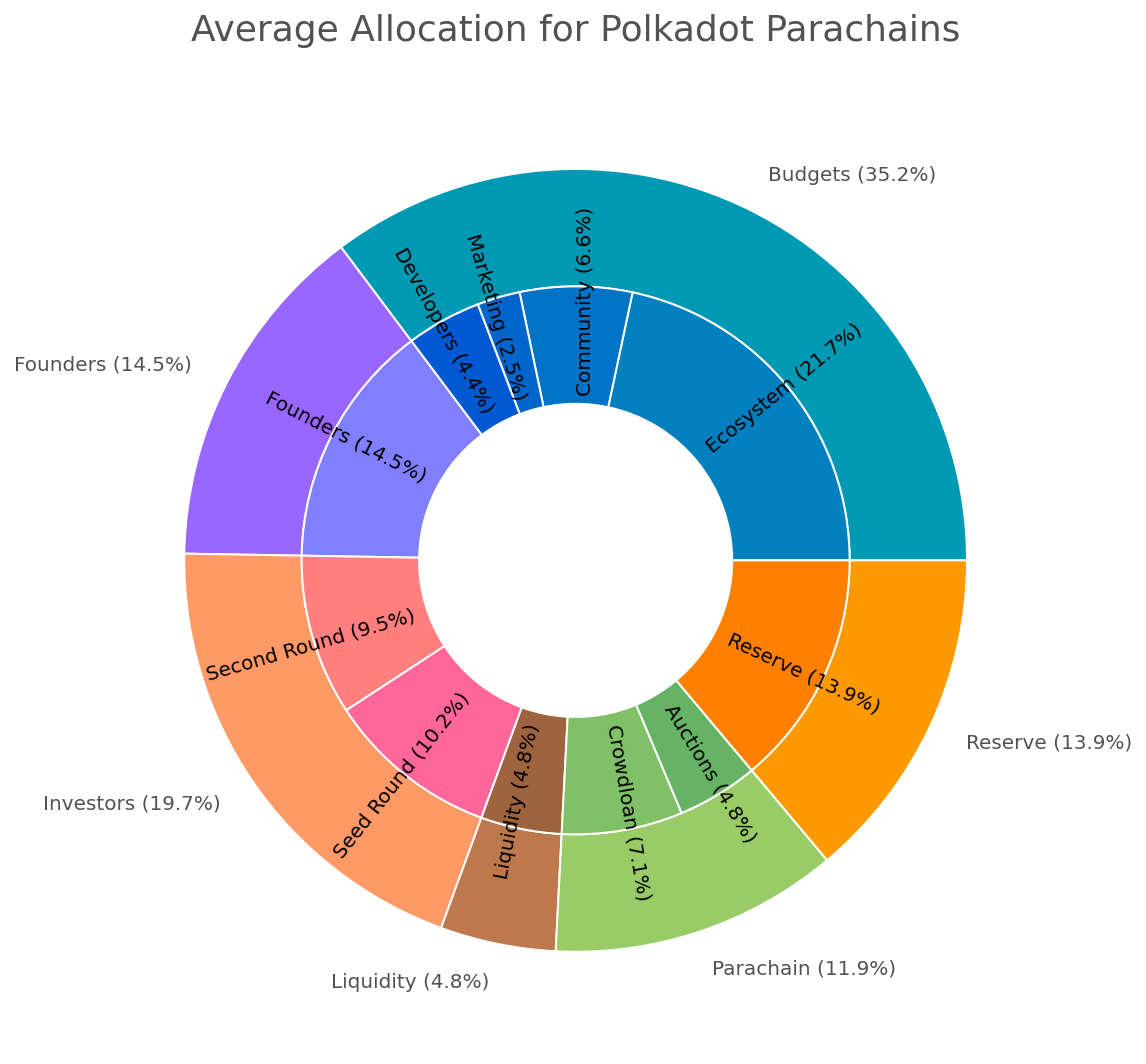

In [225]:
# plotting

facecolor = '#eaeaf2'
font_color = '#525252'
hfont = {'fontname':'Calibri'}
labels = data_df['category'].unique()
labels_with_percentage = []

for label in labels:
       labels_with_percentage.append(
                 '{} ({:.1f}%)'.format(label, data_df[data_df['category'] == label]['mean'].sum())
       )

print(labels_with_percentage)

sub_labels_with_percentage = []
sub_labels = data_df['subcategory'].unique()
for label in sub_labels:
       sub_labels_with_percentage.append(
                 '{} ({:.1f}%)'.format( label, data_df[data_df['subcategory'] == label]['mean'].mean())
       )


size = 0.3
vals = data_df['mean']
# Major category values = sum of minor category values
group_sum = data_df.groupby('category')['mean'].sum()

fig, ax = plt.subplots(figsize=(14,9),dpi=144)

a,b,c,d,e, f = [plt.cm.winter, plt.cm.cool, plt.cm.spring, plt.cm.copper, plt.cm.summer, plt.cm.autumn]

outer_colors = [a(.6), b(.6), c(.6), d(.6), e(.6), f(.6)]
inner_colors = [
       a(.5), a(0.45), a(.4), a(.35),
       b(.5),
       c(.5), c(0.4),
       d(.5),
       e(.5), e(.4),
       f(.5),
              ]


ax.pie(group_sum, 
       radius=1, 
       colors=outer_colors, 
       labels=labels_with_percentage, 
       textprops={'color':font_color},
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals, 
       radius=1-size, # size=0.3
       labels=sub_labels_with_percentage,
       rotatelabels=True,
       labeldistance=0.6,
       colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set_title('Average Allocation for Polkadot Parachains', 
       fontsize=18, pad=15, color=font_color, **hfont)

# plt.legend(loc=(1.1, .3))

filename = 'token-distribution-nested-pie'
plt.savefig(filename+'.png', facecolor=facecolor)

In [226]:
polkadot_subcat_mean['Ecosystem']

21.668035801012977

# Token valued in USDs

# By category

In [227]:
categorized_token_df = categorized_df
categorized_token_df["Total"] = 0
for cat in categories["Category"].unique():
  categorized_token_df[cat] *=  categorized_token_df["Market cap"].astype(int)/100
  categorized_token_df[cat] = categorized_token_df[cat].astype(int)
  categorized_token_df["Total"] = categorized_token_df[cat].astype(int)

categorized_token_df

,name,Relay chain,Market supply,Circulation supply,Market cap,Budgets,Reserve,Investors,Founders,Parachain,Liquidity,Total
0,Collectives,Polkadot,0,0,0,0,0,0,0,0,0,0
1,DataHighway,Polkadot,0,0,0,0,0,0,0,0,0,0
2,Bit.Country Continuum,Polkadot,0,0,0,0,0,0,0,0,0,0
3,Ares Protocol,Polkadot,1000000000,229319304,284692,142346,28469,56938,56938,0,0,0
4,Apron Network,Polkadot,1000000000,869599,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
180,Ajuna Network,Polkadot,2400000048,0,0,0,0,0,0,0,0,0
181,Acala,Polkadot,1000000000,571172222,55747193,2787359,5998397,16718583,11288806,9477022,9477022,9477022
182,Manta Network,Polkadot,0,156000005156,0,0,0,0,0,0,0,0
183,Statemine,Kusama,0,0,0,0,0,0,0,0,0,0


# By subcategory

In [228]:
subcategories_token_df = subcategories_df
subcategories_token_df["Total"] = 0

for cat in categories["Subcategory"].unique():
  subcategories_token_df[cat] *=  subcategories_token_df["Market cap"].astype(int)/100
  subcategories_token_df[cat] = subcategories_token_df[cat].astype(int)
  subcategories_token_df["Total"] += subcategories_token_df[cat].astype(int)


subcategories_token_df.to_csv('subcategories_token_df_by_usd.csv', index = True)

subcategories_token_df

,name,Relay chain,Market supply,Circulation supply,Market cap,Ecosystem,Reserve,Second Round,Founders,Seed Round,Crowdloan,Auctions,Community,Marketing,Liquidity,Developers,Total
0,Collectives,Polkadot,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,DataHighway,Polkadot,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Bit.Country Continuum,Polkadot,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Ares Protocol,Polkadot,1000000000,229319304,284692,56938,28469,56938,56938,0,0,0,71173,0,0,14234,284690
4,Apron Network,Polkadot,1000000000,869599,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,Ajuna Network,Polkadot,2400000048,0,0,0,0,0,0,0,0,0,0,0,0,0,0
181,Acala,Polkadot,1000000000,571172222,55747193,2787359,5998397,6500122,11288806,10218460,0,9477022,0,0,9477022,0,55747188
182,Manta Network,Polkadot,0,156000005156,0,0,0,0,0,0,0,0,0,0,0,0,0
183,Statemine,Kusama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# By Relay chain

In [229]:
subcategories_token_kusama_df = subcategories_token_df[subcategories_token_df["Relay chain"] == "Kusama"]
subcategories_token_polkadot_df = subcategories_token_df[subcategories_token_df["Relay chain"] == "Polkadot"]

categorized_token_kusama_df = categorized_token_df[categorized_token_df["Relay chain"] == "Kusama"]
categorized_token_polkadot_df = categorized_token_df[categorized_token_df["Relay chain"] == "Polkadot"]

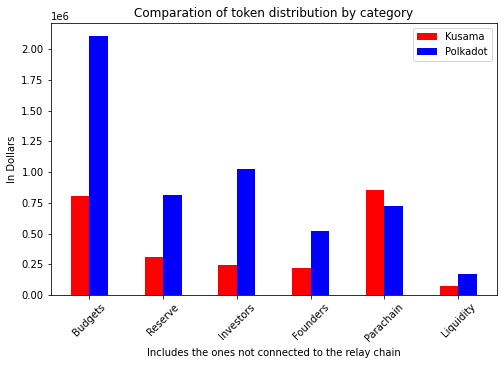

In [230]:


labels = categories["Category"].unique()
width = 0.25
x_vals = np.arange(len(labels))

plt.figure(figsize=(8,5))  

plt.bar(x_vals - width/2, categorized_token_kusama_df.loc[:,categorized_token_kusama_df.columns!='Total'].mean(numeric_only=True), color = 'r', width = width,  label='Kusama')
plt.bar(x_vals + width/2, categorized_token_polkadot_df.loc[:,categorized_token_polkadot_df.columns!='Total'].mean(numeric_only=True), color = 'b', width = width,  label='Polkadot')

plt.xticks( x_vals , labels, rotation=45 )
plt.title('Comparation of token distribution by category')
plt.ylabel('In Dollars')
plt.xlabel("Includes the ones not connected to the relay chain")
plt.legend()

plt.show()

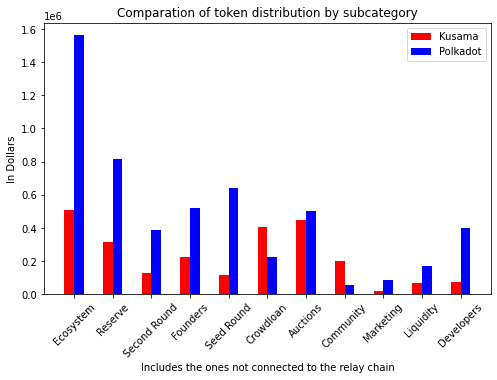

In [231]:
labels = categories["Subcategory"].unique()
width = 0.25
x_vals = np.arange(len(labels))

plt.figure(figsize=(8,5))  

plt.bar(x_vals - width/2, subcategories_token_kusama_df.loc[:, subcategories_token_kusama_df.columns!='Total' ].mean(numeric_only=True), color = 'r', width = width,  label='Kusama')
plt.bar(x_vals + width/2, subcategories_token_polkadot_df.loc[:, subcategories_token_polkadot_df.columns!='Total' ].mean(numeric_only=True), color = 'b', width = width,  label='Polkadot')

plt.xticks( x_vals , labels, rotation=45 )
plt.title('Comparation of token distribution by subcategory')
plt.ylabel('In Dollars')
plt.xlabel("Includes the ones not connected to the relay chain")
plt.legend()

plt.show()

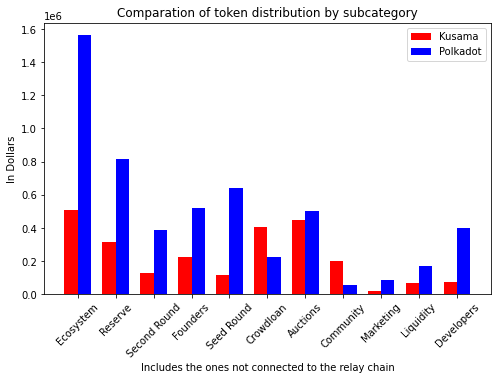

In [232]:
labels = categories["Subcategory"].unique()
width = 0.35
x_vals = np.arange(len(labels))

plt.figure(figsize=(8,5))  

plt.bar(x_vals - width/2, subcategories_token_kusama_df.loc[:, subcategories_token_kusama_df.columns!='Total' ].mean(numeric_only=True), color = 'r', width = width,  label='Kusama')
plt.bar(x_vals + width/2, subcategories_token_polkadot_df.loc[:, subcategories_token_polkadot_df.columns!='Total' ].mean(numeric_only=True), color = 'b', width = width,  label='Polkadot')

plt.xticks( x_vals , labels, rotation=45 )
plt.title('Comparation of token distribution by subcategory')
plt.ylabel('In Dollars')
plt.xlabel("Includes the ones not connected to the relay chain")
plt.legend()

plt.show()

In [233]:
conn_categorized_token_kusama_df = categorized_token_kusama_df[categorized_token_kusama_df["Total"] > 0]
conn_categorized_token_polkadot_df = categorized_token_polkadot_df[categorized_token_polkadot_df["Total"] > 0]

conn_subcategories_token_kusama_df = subcategories_token_kusama_df[subcategories_token_kusama_df["Total"] > 0]
conn_subcategories_token_polkadot_df = subcategories_token_polkadot_df[subcategories_token_polkadot_df["Total"] > 0]

## Excluding unconnected tokens

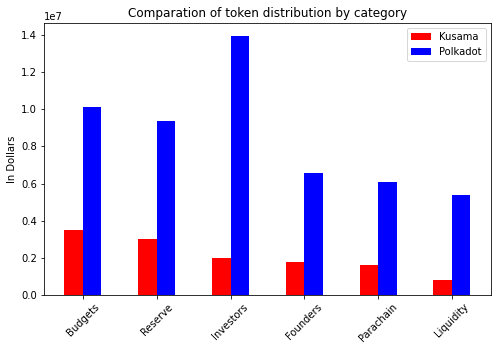

In [234]:
labels = categories["Category"].unique()
width = 0.25
x_vals = np.arange(len(labels))

plt.figure(figsize=(8,5))  

plt.bar(x_vals - width/2, conn_categorized_token_kusama_df.loc[:,conn_categorized_token_kusama_df.columns!='Total'].mean(numeric_only=True), color = 'r', width = width,  label='Kusama')
plt.bar(x_vals + width/2, conn_categorized_token_polkadot_df.loc[:,conn_categorized_token_polkadot_df.columns!='Total'].mean(numeric_only=True), color = 'b', width = width,  label='Polkadot')

plt.xticks( x_vals , labels, rotation=45 )
plt.title('Comparation of token distribution by category')
plt.ylabel('In Dollars')
plt.legend()

# plt.annotate(f'Kusama: {int(conn_categorized_token_kusama_df["Investors"].mean())}\nPolkadot: {int(conn_categorized_token_polkadot_df["Investors"].mean())}', xy=(2,4), xycoords='data',
#             xytext=(10,200), textcoords='offset points',
#             arrowprops=dict(arrowstyle='fancy',fc='0.9',
#                             connectionstyle="angle3,angleA=180,angleB=90"))


# plt.annotate(f'Kusama: {int(conn_categorized_token_kusama_df["Founders"].mean())}\nPolkadot: {int(conn_categorized_token_polkadot_df["Founders"].mean())}', xy=(3,4), xycoords='data',
#             xytext=(10,150), textcoords='offset points',
#             arrowprops=dict(arrowstyle='fancy',fc='0.9',
#                             connectionstyle="angle3,angleA=180,angleB=90"))

plt.show()

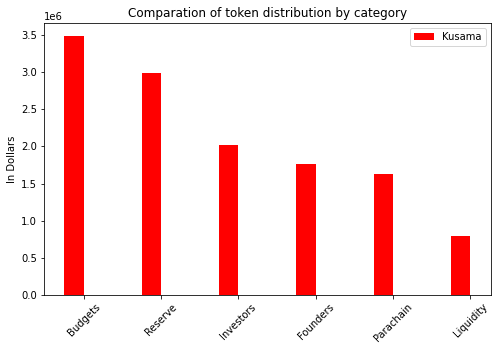

In [235]:
labels = categories["Category"].unique()
width = 0.25
x_vals = np.arange(len(labels))

plt.figure(figsize=(8,5))  

plt.bar(x_vals - width/2, conn_categorized_token_kusama_df.loc[:,conn_categorized_token_kusama_df.columns!='Total'].mean(numeric_only=True), color = 'r', width = width,  label='Kusama')

plt.xticks( x_vals , labels, rotation=45 )
plt.title('Comparation of token distribution by category')
plt.ylabel('In Dollars')
plt.legend()

# plt.annotate(f'Investors: {int(conn_categorized_token_kusama_df["Investors"].mean())}', xy=(2,4), xycoords='data',
#             xytext=(10,200), textcoords='offset points',
#             arrowprops=dict(arrowstyle='fancy',fc='0.9',
#                             connectionstyle="angle3,angleA=180,angleB=90"))


# plt.annotate(f'Founders: {int(conn_categorized_token_kusama_df["Founders"].mean())}', xy=(3,4), xycoords='data',
#             xytext=(10,150), textcoords='offset points',
#             arrowprops=dict(arrowstyle='fancy',fc='0.9',
#                             connectionstyle="angle3,angleA=180,angleB=90"))

plt.show()

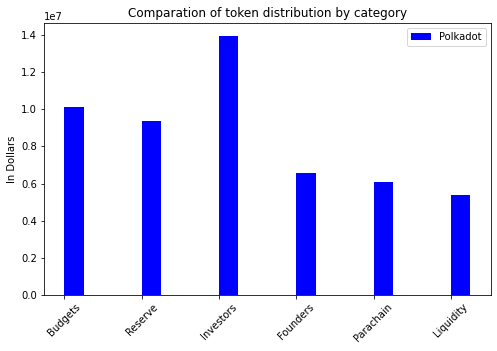

In [236]:
labels = categories["Category"].unique()
width = 0.25
x_vals = np.arange(len(labels))

plt.figure(figsize=(8,5))  

plt.bar(x_vals + width/2, conn_categorized_token_polkadot_df.loc[:,conn_categorized_token_polkadot_df.columns!='Total'].mean(numeric_only=True), color = 'b', width = width,  label='Polkadot')

plt.xticks( x_vals , labels, rotation=45 )
plt.title('Comparation of token distribution by category')
plt.ylabel('In Dollars')
plt.legend()


plt.show()

## Pie chart

## For categories

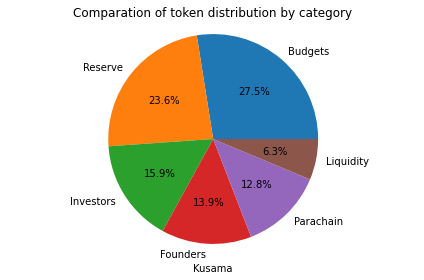

In [237]:
total_conn_categorized_token_kusama_df = conn_categorized_token_kusama_df.loc[:,conn_categorized_token_kusama_df.columns!='Total'].sum(numeric_only=True)


dic = total_conn_categorized_token_kusama_df.to_dict()

newdic={}
for key, group in itertools.groupby(dic, lambda k: 'All the rest' if (dic[k]<1) else k):
     newdic[key] = sum([dic[k] for k in list(group)])   

labels = newdic.keys()
sizes = newdic.values()

fig, ax = plt.subplots()

ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')
plt.title('Comparation of token distribution by category')
plt.xlabel(f'Kusama')
plt.tight_layout()


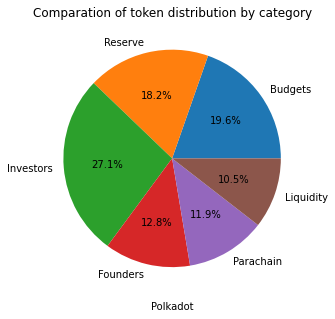

In [238]:
labels = categories["Category"].unique()
width = 0.25
x_vals = np.arange(len(labels))

plt.figure(figsize=(8,5))  

plt.pie(conn_categorized_token_polkadot_df.loc[:,conn_categorized_token_polkadot_df.columns!='Total'].sum(numeric_only=True), labels = labels, autopct='%1.1f%%')
plt.title('Comparation of token distribution by category')

plt.xlabel(f'Polkadot')


plt.show()

## Subcategories

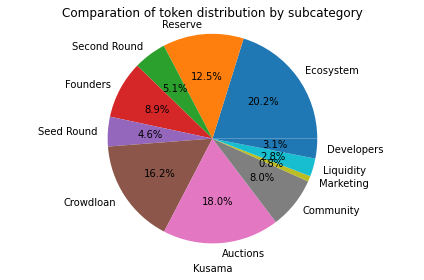

In [239]:
total_conn_subcategories_token_df = conn_subcategories_token_kusama_df.loc[:,conn_subcategories_token_kusama_df.columns!='Total'].sum(numeric_only=True)

dic = total_conn_subcategories_token_df.to_dict()

newdic={}
for key, group in itertools.groupby(dic, lambda k: 'All the rest' if (dic[k]<11) else k):
     newdic[key] = sum([dic[k] for k in list(group)])   

labels = newdic.keys()
sizes = newdic.values()

fig, ax = plt.subplots()

ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
ax.axis('equal')
plt.title('Comparation of token distribution by subcategory')
plt.xlabel(f'Kusama')
plt.tight_layout()

plt.show()

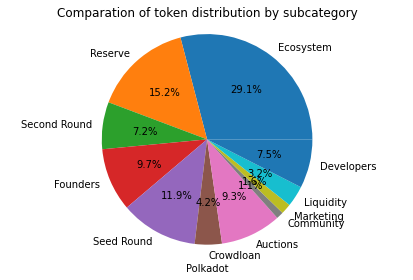

In [240]:
total_conn_subcategories_token_df = conn_subcategories_token_polkadot_df.loc[:,conn_subcategories_token_polkadot_df.columns!='Total'].sum(numeric_only=True)

dic = total_conn_subcategories_token_df.to_dict()

newdic={}
for key, group in itertools.groupby(dic, lambda k: 'All the rest' if (dic[k]<1) else k):
     newdic[key] = sum([dic[k] for k in list(group)])   

labels = newdic.keys()
sizes = newdic.values()

fig, ax = plt.subplots()

ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
ax.axis('equal')
plt.title('Comparation of token distribution by subcategory')
plt.xlabel(f'Polkadot')
plt.tight_layout()

plt.show()

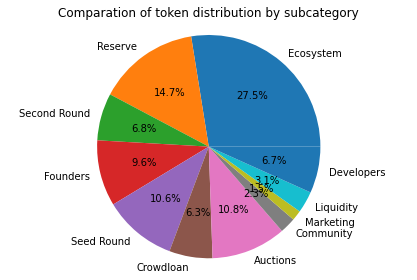

In [241]:
total_conn_subcategories_token_df = conn_subcategories_token_kusama_df.loc[:,conn_subcategories_token_kusama_df.columns!='Total'].sum(numeric_only=True)
total_conn_subcategories_token_df += conn_subcategories_token_polkadot_df.loc[:,conn_subcategories_token_polkadot_df.columns!='Total'].sum(numeric_only=True)

dic = total_conn_subcategories_token_df.to_dict()

newdic={}
for key, group in itertools.groupby(dic, lambda k: 'All the rest' if (dic[k]<1) else k):
     newdic[key] = sum([dic[k] for k in list(group)])   

labels = newdic.keys()
sizes = newdic.values()

fig, ax = plt.subplots()

ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
ax.axis('equal')
plt.title('Comparation of token distribution by subcategory')
plt.tight_layout()

plt.show()

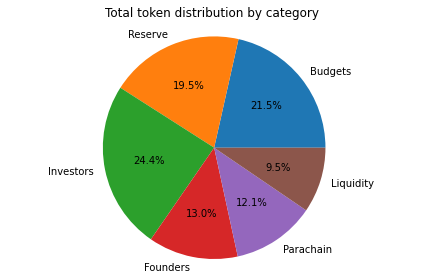

In [242]:
total_conn_categorized_token_df = conn_categorized_token_kusama_df.loc[:,conn_categorized_token_kusama_df.columns!='Total'].sum(numeric_only=True)
total_conn_categorized_token_df += conn_categorized_token_polkadot_df.loc[:,conn_categorized_token_polkadot_df.columns!='Total'].sum(numeric_only=True)


dic = total_conn_categorized_token_df.to_dict()
newdic={}
for key, group in itertools.groupby(dic, lambda k: 'All the rest' if (dic[k]<1) else k):
     newdic[key] = sum([dic[k] for k in list(group)])   

labels = newdic.keys()
sizes = newdic.values()

fig, ax = plt.subplots()

ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')
plt.title(f'Total token distribution by category')
plt.tight_layout()

plt.show()




# By Chain
    

In [243]:
df_by_name = subcategories_token_df[subcategories_token_df['name'] == 'Acala']

# total_conn_subcategories_token_by_name_df = df_by_name.sum(numeric_only=True)


# dic = total_conn_subcategories_token_by_name_df.to_dict()

# newdic={}
# for key, group in itertools.groupby(dic, lambda k: 'All the rest' if (dic[k]<31962292898) else k):
#      newdic[key] = sum([dic[k] for k in list(group)])   

# labels = newdic.keys()
# sizes = newdic.values()

# fig, ax = plt.subplots()

# ax.pie(sizes, labels=labels, autopct='%1.1f%%', explode=(0,0,0,0,0,.1,0,0), startangle=0)
# ax.axis('equal')
# plt.title('Comparation of token distribution by subcategory')
# plt.tight_layout()

# plt.show()

In [244]:
# categorized_token_df

# labels = categories["Category"].unique()
# width = 0.25
# x_vals = np.arange(len(labels))

# plt.style.use('ggplot')

# for i, group in categorized_token_df.groupby("name"):
#     try:
#         plt.figure()
#         plt.pie(group.loc[:,group.columns!='Total'].sum(numeric_only=True), labels = labels, autopct='%1.1f%%')

#         plt.gca().set_aspect('equal', adjustable='box')
        
#         plt.title(f'{i}')
#         plt.show()
        
#     except:
#         continue